*Lucía García-Duarte Sáenz*
************************

# Analysing the NYC Taxi Trips 

Every Thanksgiving, hundreds of thousands of New Yorkers leave the city to visit their relatives, while many others decide to stay. The New York City Council is interested in knowing how busy streets are and where people travel inside the city during this important holiday. So, the aim of this work is to analyse the New York City network of taxi trips to discover further insights regarding how people move within the city, which are the busiest hours, or what factors have the greatest influence on tips. The dataset to be used can be found <a href="https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page" target="_blank">here</a>.

To do so, different tasks will be carried out: (1) **data exploration and cleaning** to preprocess the data and prepare it for the analysis, (2) **data summary** to find out interesting features, insigths and patterns within the data, and (3) **model building** to better understand what is the typical tip clients leave to cab drivers depending on the trip and what factors influence this amount the most.

## 1. Data Exploration and Cleaning

Before summarizing the main features of the data and obtaining a relevant understanding about taxi trip tendencies during Thanksgiving, it is important to prepare, clean and complete the available data.

First, let us load the data and see some samples:

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

mypath = 'data/tlc_yellow_trips_2018_11_22.csv'
data = pd.read_csv(mypath)

data.tail(8)

vendor_id      pickup_datetime     dropoff_datetime  passenger_count  \
174339          2  2018-11-22 23:49:19  2018-11-23 00:19:30                1   
174340          2  2018-11-22 12:07:17  2018-11-22 12:21:24                1   
174341          2  2018-11-22 12:56:57  2018-11-22 13:45:33                1   
174342          2  2018-11-22 14:29:03  2018-11-22 15:20:07                1   
174343          2  2018-11-22 22:35:38  2018-11-22 23:09:07                1   
174344          2  2018-11-22 13:25:21  2018-11-22 14:09:30                1   
174345          2  2018-11-22 10:32:08  2018-11-22 10:49:17                1   
174346          1  2018-11-22 02:41:09  2018-11-22 02:42:35                1   

        trip_distance  rate_code store_and_fwd_flag  payment_type  \
174339          15.50          5                  N             1   
174340           5.08          5                  N             1   
174341          14.05          5                  N             1   
174342          13.86          5                  N             1   
174343           8.38          5                  N             1   
174344          11.42          5                  N             1   
174345           8.45          5                  N             1   
174346           0.30          1                  N             2   

        fare_amount  extra  mta_tax  tip_amount  tolls_amount  imp_surcharge  \
174339        41.81    0.0      0.5         0.0          0.00            0.3   
174340        16.21    0.0      0.5         0.0          0.00            0.3   
174341        39.99    0.0      0.5         0.0          0.00            0.3   
174342        50.23    0.0      0.5         0.0          5.76            0.3   
174343        24.29    0.0      0.5         0.0          0.00            0.3   
174344        32.71    0.0      0.5         0.0          5.76            0.3   
174345        23.95    0.0      0.5         0.0          0.00            0.3   
174346    187436.46    0.5      0.5         0.0          0.00            0.3   

        total_amount  pickup_location_id  dropoff_location_id  
174339         42.61                 114                  131  
174340         17.01                 258                   76  
174341         40.79                 225                   38  
174342         56.79                  90                   39  
174343         25.09                 139                   76  
174344         39.27                   7                  240  
174345         24.75                  16                  102  
174346     187437.76                 246                  246

In [2]:
shape_init = data.shape
print(shape_init)

(174347, 17)


The dataset is composed by 174347 registers and 17 variables.

Now, let us check that all data belongs to the specified period of time, which is Thaksgiving's Day 2018:

In [3]:
data['pickup_datetime'] =  pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] =  pd.to_datetime(data['dropoff_datetime'])

n = len(data.pickup_datetime.dt.strftime('%Y-%m-%d').unique())
val = data.pickup_datetime.dt.strftime('%Y-%m-%d').unique()

print('Number of unique values: ', n)
print('Different values: ', str(val)[1:-1])

Number of unique values:  1
Different values:  '2018-11-22'


Indeed! That is the only date we where looking for, so we don't need to remove entries here. Now, before start looking at the data for cleaning and exploration, we must check if there are some missing values. In that case, we would have to perform imputation to complete the dataset.

In [4]:
data.isnull().sum() # or .isna()

vendor_id              0
pickup_datetime        0
dropoff_datetime       0
passenger_count        0
trip_distance          0
rate_code              0
store_and_fwd_flag     0
payment_type           0
fare_amount            0
extra                  0
mta_tax                0
tip_amount             0
tolls_amount           0
imp_surcharge          0
total_amount           0
pickup_location_id     0
dropoff_location_id    0
dtype: int64

As seen, there are no unobserved values! Therefore, imputation is not needed and we can proceed.

### *Explore the variables*

Here, we are going to visualize different variables and perform some calculations to detect abnormalities, incorrect values or values that do no make any sense. We will also make use of <a href="https://www1.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf" target="_blank">this</a> **dictionary** to make sure and verify whether the recorded data is correct when compared to their description. Additionally, we will make use of <a href="https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page" target="_blank">this</a> **look-up** table to get knowledge about the different locations were taxis pick up and drop off passengers.




Let's begin by plotting some variables:

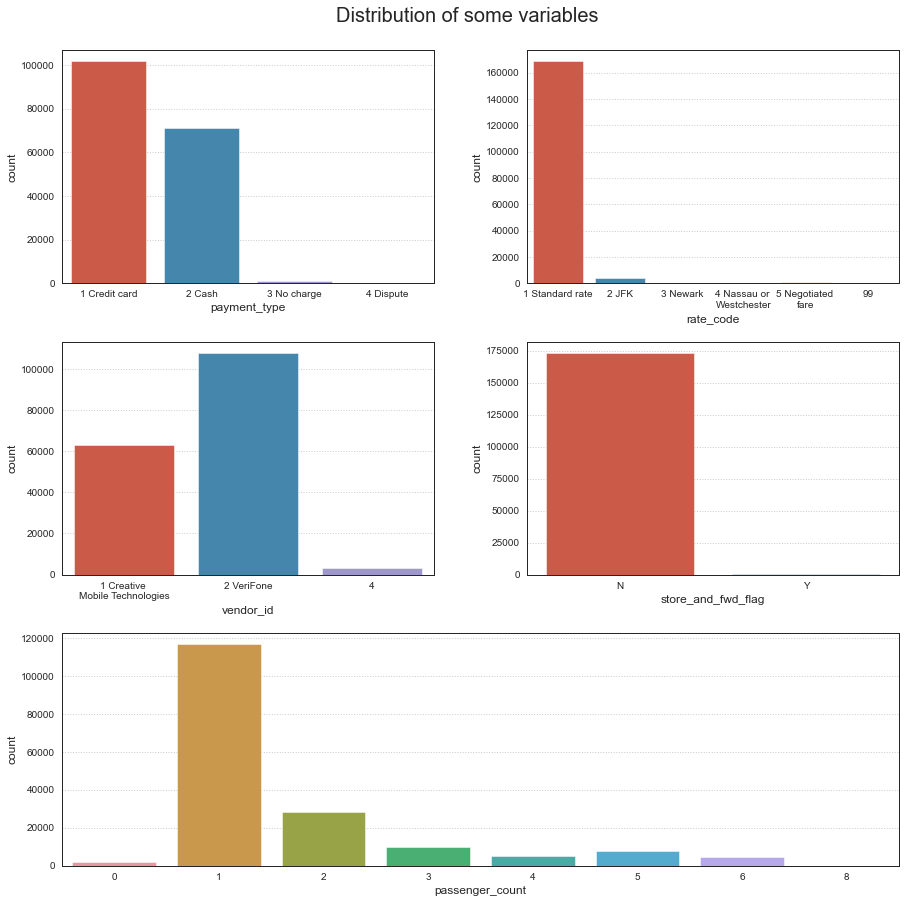

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
sns.set_style('white')

fig = plt.figure(figsize=(15, 15))
fig.suptitle('Distribution of some variables', fontsize=20, y=0.92)
plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

sub1 = fig.add_subplot(3,2,1) 
sns.countplot(x = "payment_type", data = data, ax=sub1)
sub1.set_xticklabels(["1 Credit card", "2 Cash", "3 No charge", "4 Dispute"])
sub1.grid(axis = 'y', linestyle='dotted', linewidth=1)

sub2 = fig.add_subplot(3,2,2) 
sns.countplot(x = "rate_code", data = data, ax=sub2)
sub2.set_xticklabels(["1 Standard rate", "2 JFK", "3 Newark", "4 Nassau or \nWestchester","5 Negotiated \nfare", "99"])
sub2.grid(axis = 'y', linestyle='dotted', linewidth=1)

sub3 = fig.add_subplot(3,2,3) 
sns.countplot(x = "vendor_id", data = data, ax=sub3)
sub3.set_xticklabels(["1 Creative \nMobile Technologies", "2 VeriFone", "4"])
sub3.grid(axis = 'y', linestyle='dotted', linewidth=1)

sub4 = fig.add_subplot(3,2,4) 
sns.countplot(x = "store_and_fwd_flag", data = data, ax=sub4)
sub4.grid(axis = 'y', linestyle='dotted', linewidth=1)

sub5 = fig.add_subplot(3,2,(5,6)) 
sns.countplot(x = "passenger_count", data = data, ax=sub5)
sub5.grid(axis = 'y', linestyle='dotted', linewidth=1)

#data.groupby('passenger_count')['trips'].count().reset_index()
#data.groupby('payment_type')['trips'].count().reset_index()
#data.groupby('rate_code')['trips'].count().reset_index()
#data.groupby('vendor_id')['trips'].count().reset_index()
#data.groupby('store_and_fwd_flag')['trips'].count().reset_index()

From the graphs and the data dictionary, we can draw the following conclusions:
- The variables `payment_type` and `store_and_fwd_flag` seem correct, as they lie within the values specified in the dictionary.
- It can be seen that the variables `rate_code` and `vendor_id` have labels that do not appear in the dictionary, so they must be removed.
- The variable `passenger_count` has some trips with value = 0, meaning that no passangers were occupying the taxi cab. Hence, we will eliminate those entries because no one was in the taxi cab to pay for the trip.

If we look at the aforedmentioned lookup table, locations 264 and 265 are not defined (*N/A*). Therefore we will remove locations with ID greater than 264. Let's look at how many registers are wrongly stored for each `pickup_location_id` and `dropoff_location_id` variables:

In [6]:
# Add column trips as index
data.reset_index(inplace=True)
data = data.rename(columns = {'index':'trips'})

data[data.pickup_location_id>=264].groupby('pickup_location_id')['trips'].count().reset_index().set_index("pickup_location_id").transpose()   

pickup_location_id   264  265
trips               3981  134

In [7]:
data[data.dropoff_location_id>=264].groupby('dropoff_location_id')['trips'].count().reset_index().set_index("dropoff_location_id").transpose()   

dropoff_location_id   264  265
trips                3716  540

As seen, there are a few many registers that we have no knowledge of from and to the cabs went.

Additionally, there are variables that seem numerical but are indeed categorical according to their description in the dictionary. Let us check the values that these variables have:

In [8]:
#sns.countplot(x = "extra", data = data)  
#plt.grid(axis = 'y', linestyle='dotted', linewidth=1)
data.groupby('extra')['trips'].count().reset_index().set_index("extra").transpose()  

extra  -4.5   -1.0   -0.5     0.0    0.5    0.8    1.0    1.3    4.5    17.5  \
trips      1      1     71  114049  58241      5   1935      2     39      2   

extra   18.0  
trips      1

In [9]:
#sns.countplot(x = "mta_tax", data = data)  
#plt.grid(axis = 'y', linestyle='dotted', linewidth=1)
data.groupby('mta_tax')['trips'].count().reset_index().set_index("mta_tax").transpose()    

mta_tax  -0.5   0.0     0.5
trips     193   965  173189

In [10]:
#sns.countplot(x = "imp_surcharge", data = data)  
#plt.grid(axis = 'y', linestyle='dotted', linewidth=1)
data.groupby('imp_surcharge')['trips'].count().reset_index().set_index("imp_surcharge").transpose()  

imp_surcharge  -0.3   0.0     0.3
trips           203    59  174085

According to the dictionary:
- The variable `extra` can only take up values of 0, 0.5 or 1.
- The variable `mta_tax` can only take up values of 0 or 0.5.
- The variable `imp_surcharge` can only take up values of 0 or 0.3.

So, we must eliminate those registers that do not have such values, including negative entries.

Lastly, there are many variables that cannot take negative values, which are those related with money, speed, time and distance. See that here we have constructed two additional variables, `diff_datetime` (trip duration) and `velocity` (average speed in km/h), for further insights. Again, let's look at how many registers are stored as negative (notice that in some cases values cannot be zero either, i.e. speed, time of fare):

In [11]:
# Obtain time difference 
data['diff_datetime'] = (data['dropoff_datetime'] - data['pickup_datetime'])/ np.timedelta64(1, "s") # convert to seconds by dividing by another timedelta

# Obtain velocity
data['velocity'] = data['trip_distance'] * 3600 *1.6 /data['diff_datetime']   # from miles to km and from s to h
data['velocity'].replace([np.inf, -np.inf], np.nan, inplace=True)
data['velocity'] = data['velocity'].dropna()

# Count incorrect entries per continuos feature
num_incorrect = (["Incorrect entries"])
feature = {"neg total_amount": data.trips[data.total_amount<0].count(),
                 "neg fare_amount": data.trips[data.fare_amount<=0].count(),
                 "neg tip_amount": data.trips[data.tip_amount<0].count(),
                 "neg tolls_amount": data.trips[data.tolls_amount<0].count(),
                 "neg diff_datetime": data.trips[data.diff_datetime<=0].count(),
                 "neg trip_distance": data.trips[data.trip_distance<=0].count(),
                 "neg velocity": data.trips[data.velocity<=0].count()
          }
df = pd.DataFrame(feature, index=num_incorrect)
df

neg total_amount  neg fare_amount  neg tip_amount  \
Incorrect entries               203              269               2   

                   neg tolls_amount  neg diff_datetime  neg trip_distance  \
Incorrect entries                 3                110               1370   

                   neg velocity  
Incorrect entries          1268

Before continuing, we are going to consider the features `velocity`, `diff_datetime` and `trip_distance`, and plot their histograms and boxplots to look for inconsistencies. 

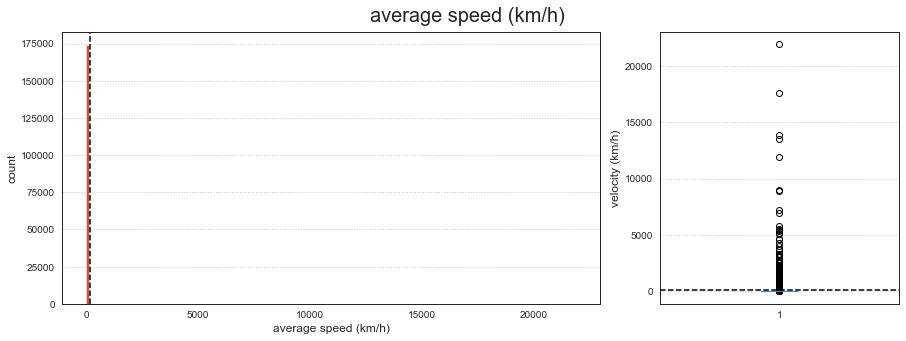

In [12]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('average speed (km/h)', fontsize=20, y=0.95)
plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

sub1 = fig.add_subplot(1,3,(1,2)) 
plt.hist(data['velocity'].dropna(), bins=200)          # remove NaN values for plotting --> 
plt.axvline(x=150,color='k',linestyle='--');           # (these will be filtered when removing rows with no durantion)
sub1.grid(axis = 'y', linestyle='dotted', linewidth=1)
plt.xlabel("average speed (km/h)");plt.ylabel("count")

sub2 = fig.add_subplot(1,3,3) 
plt.boxplot(data['velocity'].dropna())
plt.axhline(y=150,color='k',linestyle='--');           
sub2.grid(axis = 'y', linestyle='dotted', linewidth=1)
plt.ylabel("velocity (km/h)");

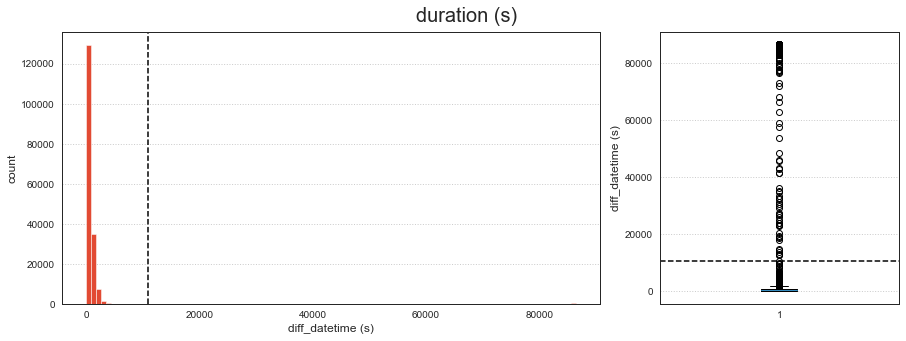

In [13]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('duration (s)', fontsize=20, y=0.95)
plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

sub1 = fig.add_subplot(1,3,(1,2)) 
plt.hist(data.diff_datetime, bins=100);
plt.axvline(x=3*3600,color='k',linestyle='--');
sub1.grid(axis = 'y', linestyle='dotted', linewidth=1)
plt.xlabel("diff_datetime (s)");plt.ylabel("count")

sub2 = fig.add_subplot(1,3,3) 
plt.boxplot(data.diff_datetime)
plt.axhline(y=3*3600,color='k',linestyle='--');
sub2.grid(axis = 'y', linestyle='dotted', linewidth=1)
plt.ylabel("diff_datetime (s)");

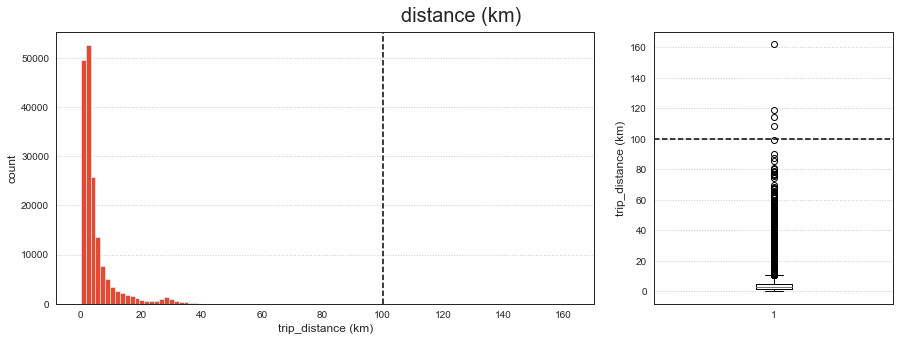

In [14]:
fig = plt.figure(figsize=(15, 5))
fig.suptitle('distance (km)', fontsize=20, y=0.95)
plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

sub1 = fig.add_subplot(1,3,(1,2)) 
plt.hist(data.trip_distance*1.6, bins=100);
plt.axvline(x=100,color='k',linestyle='--');
sub1.grid(axis = 'y', linestyle='dotted', linewidth=1)
plt.xlabel("trip_distance (km)");plt.ylabel("count")

sub2 = fig.add_subplot(1,3,3) 
plt.boxplot(data.trip_distance*1.6)
plt.axhline(y=100,color='k',linestyle='--');
sub2.grid(axis = 'y', linestyle='dotted', linewidth=1);
plt.ylabel("trip_distance (km)");

It can be seen that the distributions are skewed to the right, so mostly short trips occurred. Also, we can observe that there are very large values for such variables, which do not make much sense. Therefore, we are going to set some upper thresholds (dashed black lines in the graphs) to eliminate outliers:
- Since trips are occuring withing NYC, `velocity` values over ~150 km/h are highly unlikely to occur.
- Largest distances between locations in NYC lie around ~ 40 miles (~65 km), so distances over this limit are also highly unlikely to happen. Since this is a subjective approximation, we will filter and remove trips with a distance `trip_distance` greater than 100 km.
- Also, we will filter for trips with a `diff_datetime` lower than 3 hours, since such distances can be covered in much less time, even considerring traffic.

In the next table we can see how many registers are considered to have extreem values per selected variable:

In [15]:
feature = {"large diff_datetime": data.trips[data.diff_datetime>3*3600].count(),
           "large trip_distance": data.trips[data.trip_distance>60].count(), # 60 miles are ~100 km
           "large velocity": data.trips[data.velocity>150].count() #data.velocity.isnull().sum()
          }

df = pd.DataFrame(feature, index=num_incorrect)
df

large diff_datetime  large trip_distance  large velocity
Incorrect entries                  572                    5             130

 Notice that there are other aspects that can be checked, for instance:
 - The `total_amount` is the total amount charged to the clients which does not include cash tips, because `trip_amount` only contains credit card tips. 
 - The `total_amount` should be the addition of all *price* variables. We will round the results to have the same number of decimals as the raw variable `total_amount` for comparison.

In [16]:
data['total_manual'] = np.round(data.fare_amount + data.tip_amount + data.tolls_amount + data.extra + data.mta_tax + data.imp_surcharge,2)
print('Number of entries with wrong total_amount:',len(data.iloc[np.where(data['total_manual'].values != data['total_amount'].values)[0]]))
print('Number of entries that include tips for trips not paid with credit card:',len(data[(data.tip_amount > 0) & (data.payment_type > 1)]))

Number of entries with wrong total_amount: 605
Number of entries that include tips for trips not paid with credit card: 4


### *Data cleaning*

Now that we have analysed the data and highlighted incorrected entries, we are ready to filter and clean the dataset. Here we present two different ways of doing so:
1. *Basic python*: the data is filtered using different conditions over the dataframe in the python environment.
2. *PySpark*: the data is filtered using a distributed environment. For big data volumes, this parallel approach greatly reduces the computational time.  

In [17]:
data_filtered = data[(data['fare_amount'] > 0) & 
                        (data['total_amount'] >= 0) & 
                        (data['tolls_amount'] >= 0) & 
                        (data['tip_amount'] >= 0) & 
                        ((data['trip_distance'] > 0) & (data['trip_distance'] <= 60)) &
                        (data['pickup_location_id'] < 264) & 
                        (data['dropoff_location_id'] < 264) &
                        ((data['rate_code'] > 0) & (data['rate_code'] <= 6)) &
                        ((data['vendor_id'] > 0) & (data['vendor_id'] <= 2)) &
                        ((data['extra'] == 0.0) | (data['extra'] == 0.5) | (data['extra'] == 1)) &
                        ((data['mta_tax'] == 0.0) | (data['mta_tax'] == 0.5)) &
                        ((data['imp_surcharge'] == 0.0) | (data['imp_surcharge'] == 0.3)) &
                        ((data['diff_datetime'] > 0) & (data['diff_datetime'] <= 3*3600)) &
                        ((data['velocity'] > 0) & (data['velocity'] <= 150)) &
                        (data['passenger_count'] > 0) &
                        (data['total_manual'] == data['total_amount'])]

data_filtered = data_filtered.drop('total_manual', axis=1)
print(data_filtered.shape)

(161991, 20)


In [18]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
from pyspark.sql.functions import unix_timestamp
from pyspark.sql.functions import round   
spark = SparkSession.builder.appName('taxi').getOrCreate()

data_raw = spark.read.csv(mypath,sep=',',inferSchema=True, header=True)
data_aux1 = data_raw.withColumn("diff_datetime",(unix_timestamp('dropoff_datetime', "yyyy-MM-dd HH:mm:ss") - unix_timestamp('pickup_datetime', "yyyy-MM-dd HH:mm:ss")))
data_aux2 = data_aux1.withColumn("velocity", data_aux1.trip_distance * 3600 * 1.6 / data_aux1.diff_datetime)
data_aux3 = data_aux2.withColumn("total_manual", data_aux2.fare_amount + data_aux2.tip_amount + data_aux2.tolls_amount + data_aux2.extra + data_aux2.mta_tax + data_aux2.imp_surcharge)
data_aux = data_aux3.select("*",round(data_aux3.total_manual))

data_filtered_ps = data_aux.filter(data_aux.fare_amount > 0).\
                        filter(data_aux.total_amount > 0).\
                        filter(data_aux.tolls_amount >= 0).\
                        filter(data_aux.tip_amount >= 0).\
                        filter((data_aux.trip_distance > 0) & (data_aux.trip_distance <= 60)).\
                        filter(data_aux.pickup_location_id < 264).\
                        filter(data_aux.dropoff_location_id < 264).\
                        filter((data_aux.rate_code > 0) & (data_aux.rate_code <= 6)).\
                        filter((data_aux.vendor_id > 0) & (data_aux.vendor_id <= 2)).\
                        filter((data_aux.extra == 0) | (data_aux.extra == 0.5) | (data_aux.extra == 1)).\
                        filter((data_aux.mta_tax == 0) | (data_aux.mta_tax == 0.5)).\
                        filter((data_aux.imp_surcharge == 0) | (data_aux.imp_surcharge == 0.3)).\
                        filter((data_aux.diff_datetime > 0) & (data_aux.diff_datetime <= 3*3600)).\
                        filter((data_aux.velocity > 0) & (data_aux.velocity <= 150)).\
                        filter(data_aux.passenger_count > 0).\
                        filter(round(data_aux.total_manual,2) == data_aux.total_amount).\
                        toPandas()
spark.stop()
data_filtered_ps = data_filtered_ps.drop('total_manual', axis=1)
print(data_filtered_ps.shape)

(161991, 20)


Up to now, we have been able to explore the data and perform data quality and cleaning methodologies. However, potential outliers still remain in the data. For instance, lets consider the variable `diff_datetime`. From the graphs it can be seen that there exists outliers in the data. Indeed, for durations that last less than 2 minutes, the price is drastically too large in some cases. Therefore, we will remove trips with durations lower than 2 minutes. 

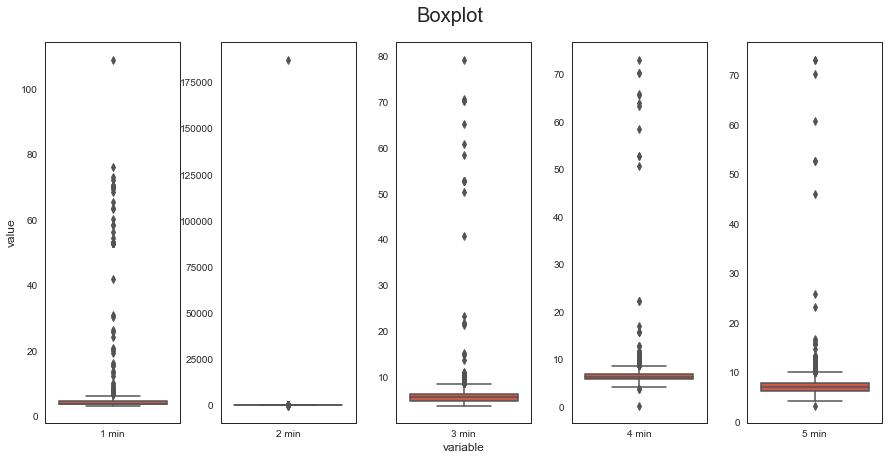

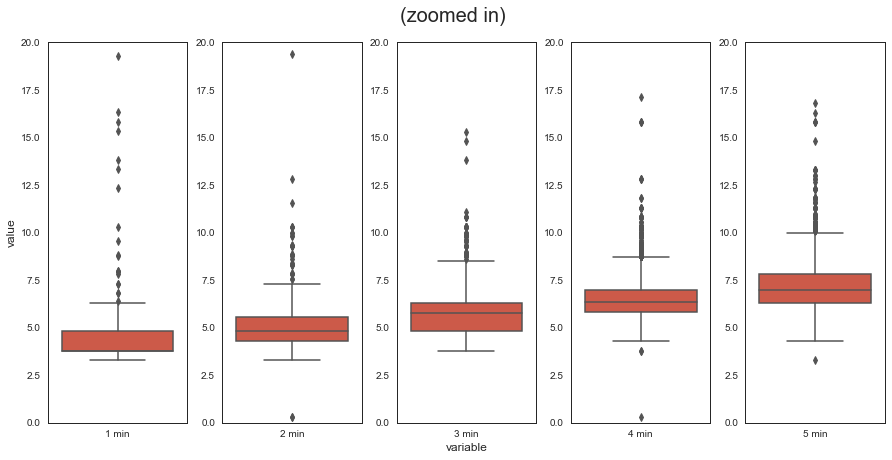

In [19]:
tot_1 = data_filtered.total_amount[(data_filtered.diff_datetime<=60)]
tot_2 = data_filtered.total_amount[(data_filtered.diff_datetime<=120) &(data_filtered.diff_datetime>60)]
tot_3 = data_filtered.total_amount[(data_filtered.diff_datetime<=180) &(data_filtered.diff_datetime>120)]
tot_4 = data_filtered.total_amount[(data_filtered.diff_datetime<=240) &(data_filtered.diff_datetime>180)]
tot_5 = data_filtered.total_amount[(data_filtered.diff_datetime<=300) &(data_filtered.diff_datetime>240)]

tot_1 = pd.DataFrame(data = np.column_stack([tot_1.values]), columns = ['1 min'])
tot_2 = pd.DataFrame(data = np.column_stack([tot_2.values]), columns = ['2 min'])
tot_3 = pd.DataFrame(data = np.column_stack([tot_3.values]), columns = ['3 min'])
tot_4 = pd.DataFrame(data = np.column_stack([tot_4.values]), columns = ['4 min'])
tot_5 = pd.DataFrame(data = np.column_stack([tot_5.values]), columns = ['5 min'])


fig = plt.figure(figsize=(15, 7))
fig.suptitle('Boxplot', fontsize=20, y=0.95)
plt.subplots_adjust(wspace= 0.3, hspace= 0.25)

sub1 = fig.add_subplot(1,5,1) 
sns.boxplot(x="variable", y="value", data=pd.melt(tot_1),ax=sub1)
sub1.set(xlabel=None)

sub2 = fig.add_subplot(1,5,2) 
sns.boxplot(x="variable", y="value", data=pd.melt(tot_2),ax=sub2)
sub2.set(xlabel=None, ylabel=None)

sub3 = fig.add_subplot(1,5,3) 
sns.boxplot(x="variable", y="value", data=pd.melt(tot_3),ax=sub3)
sub3.set(ylabel=None)

sub4 = fig.add_subplot(1,5,4) 
sns.boxplot(x="variable", y="value", data=pd.melt(tot_4),ax=sub4)
sub4.set(xlabel=None, ylabel=None)

sub5 = fig.add_subplot(1,5,5) 
sns.boxplot(x="variable", y="value", data=pd.melt(tot_5),ax=sub5)
sub5.set(xlabel=None, ylabel=None)


fig = plt.figure(figsize=(15, 7))
fig.suptitle('(zoomed in)', fontsize=20, y=0.95)
plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

sub1 = fig.add_subplot(1,5,1) 
sns.boxplot(x="variable", y="value", data=pd.melt(tot_1),ax=sub1)
sub1.set(xlabel=None)
sub1.set_ylim([0, 20])

sub2 = fig.add_subplot(1,5,2) 
sns.boxplot(x="variable", y="value", data=pd.melt(tot_2),ax=sub2)
sub2.set(xlabel=None, ylabel=None)
sub2.set_ylim([0, 20])

sub3 = fig.add_subplot(1,5,3) 
sns.boxplot(x="variable", y="value", data=pd.melt(tot_3),ax=sub3)
sub3.set(ylabel=None)
sub3.set_ylim([0, 20])

sub4 = fig.add_subplot(1,5,4) 
sns.boxplot(x="variable", y="value", data=pd.melt(tot_4),ax=sub4)
sub4.set(xlabel=None, ylabel=None)
sub4.set_ylim([0, 20])

sub5 = fig.add_subplot(1,5,5) 
sns.boxplot(x="variable", y="value", data=pd.melt(tot_5),ax=sub5)
sub5.set(xlabel=None, ylabel=None)
sub5.set_ylim([0, 20]);

In [20]:
data_filtered = data_filtered[data_filtered['diff_datetime'] >= 120]

See that more robust approaches could be performed to further improve the quality of the data. For instance, the *Minimum Covariance Determinant (MCD) estimators* method tries to find observations whose empirical covariance has the smallest determinant, yielding a subset of data 'free' from outliers. This could be interesting for future studies.

Now, the number of registers has been reduced by 9.6%, and we still have a substantial amount of data to start the digging into the interesting trends and discoverings.

In [21]:
data_filtered.to_csv('data/data_filtered.csv', header=True, index=False)
print(data_filtered.shape)
print((shape_init[0] - data_filtered.shape[0] )/shape_init[0] *100)

(157568, 20)
9.623910936236356


## 2. Data Summary

In this section, we will use the previously cleaned data to spot some interesting features and try understand the urban mobility in NYC caused by the celebration of Thanksgiving. 

For this purpose, we will first, and similarly to what we did before, take a look at the different variables and try discover diferences between short and long trips. We will also perform some operations by grouping the variables so to be able to found out curious trends. Additionally, a spatial analysis will be carried out to better visualize the outcomes in a geolocalized way.

### Exploratory analisis

The data was divided into short and long trips by spliting the data according to the distance travelled. We considered 10 km as a limit to categorize the taxi trips into this two labels.

First, we will consider the **numerical variables**:

In [22]:
def plot_vars_num(data, var, do_log = True):
    short_trips = data[data.trip_distance <= 10/1.6]  # 15km
    long_trips = data[data.trip_distance > 10/1.6]  

    if do_log:
        fig = plt.figure(figsize=(15, 4))
        fig.suptitle(var, fontsize=20, y=0.98)

        sub1 = fig.add_subplot(1,3,1) 
        plt.hist(x = data[var], bins=100, color = 'tab:blue')
        plt.hist(x = short_trips[var], bins=100, color = 'tab:green')
        plt.hist(x = long_trips[var], bins=100, color = 'tab:red')
        plt.grid(axis = 'y', linestyle='dotted', linewidth=1)

        sub2 = fig.add_subplot(1,3,2) 
        plt.hist(x = np.log(data[var]), bins=100, color = 'tab:blue')
        plt.hist(x = np.log(short_trips[var]), bins=100, color = 'tab:green')
        plt.hist(x = np.log(long_trips[var]), bins=100, color = 'tab:red')
        plt.grid(axis = 'y', linestyle='dotted', linewidth=1)
        
        sub3 = fig.add_subplot(1,3,3)      
        df1 = pd.DataFrame(columns = ['data','type'])
        df1['data'] = data[var]
        df1['type'] = 'all'
        df2 = pd.DataFrame(columns = ['data','type'])
        df2['data'] = short_trips[var]
        df2['type'] = 'short'
        df3 = pd.DataFrame(columns = ['data','type'])
        df3['data'] = long_trips[var]
        df3['type'] = 'long'
        df = pd.concat([df1,df2,df3])
        
        my_pal = {"all": "tab:blue", "short": "tab:green", "long":"tab:red"}
        sns.boxplot(x="type", y="data", data=df, palette=my_pal)
        plt.grid(axis = 'y', linestyle='dotted', linewidth=1)
        
    else:
        fig = plt.figure(figsize=(10, 4))
        fig.suptitle(var, fontsize=20, y=0.98)

        sub1 = fig.add_subplot(1,2,1) 
        plt.hist(x = data[var], bins=100, color = 'tab:blue')
        plt.hist(x = short_trips[var], bins=100, color = 'tab:green')
        plt.hist(x = long_trips[var], bins=100, color = 'tab:red')
        plt.grid(axis = 'y', linestyle='dotted', linewidth=1)   
        
        sub2 = fig.add_subplot(1,2,2)
        df1 = pd.DataFrame(columns = ['data','type'])
        df1['data'] = data[var]
        df1['type'] = 'all'
        df2 = pd.DataFrame(columns = ['data','type'])
        df2['data'] = short_trips[var]
        df2['type'] = 'short'
        df3 = pd.DataFrame(columns = ['data','type'])
        df3['data'] = long_trips[var]
        df3['type'] = 'long'
        df = pd.concat([df1,df2,df3])
        my_pal = {"all": "tab:blue", "short": "tab:green", "long":"tab:red"}
        sns.boxplot(x="type", y="data", data=df, palette=my_pal)
        plt.grid(axis = 'y', linestyle='dotted', linewidth=1)

From the plots below, the following can be seen:
- Far more short than long trips ocurred. This could be due to the fact that most people went to celebrate the day with others who lived close.
- As expected, longer trip prices were lower for short than long trips, though some short trips were more expensive than long ones, probably because of the additional costs as tolls, or because greater tips were given.
- Interestingly, taxi cab drivers who travelled longer distances drove faster, probably because they took a highway to reach the destination. And so, the mayority of the drives whose price included toll charges were long. 
- Also, longer trips took in general longer to complete than the short ones, though some short trips may took more time due to traffic conditions.
- The tips given to the drivers were also greater for longer trips.
- As seen, the tendency is that 1 passenger goes in the taxi cab at a time, independently of the distance travelled. 

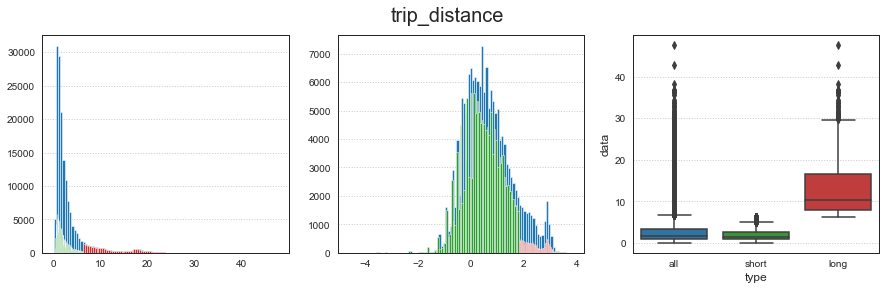

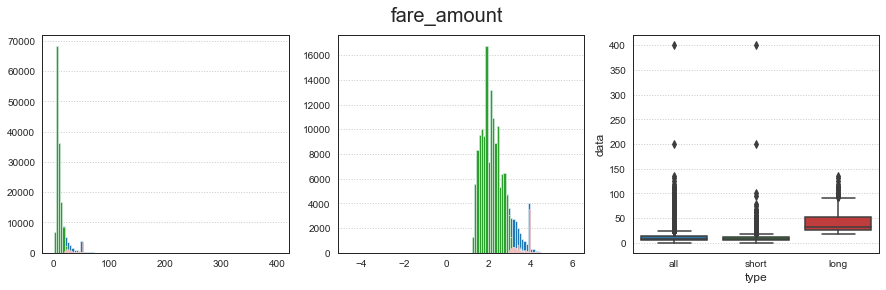

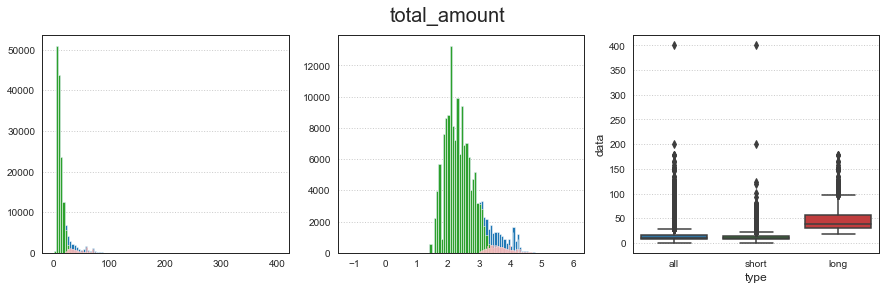

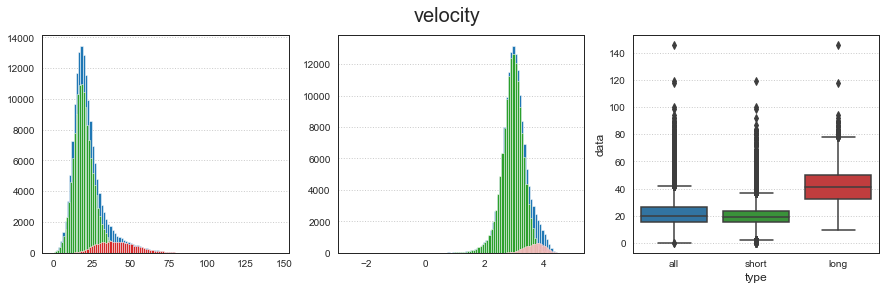

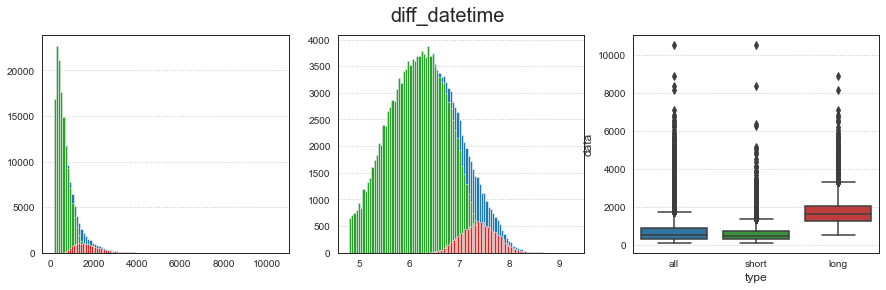

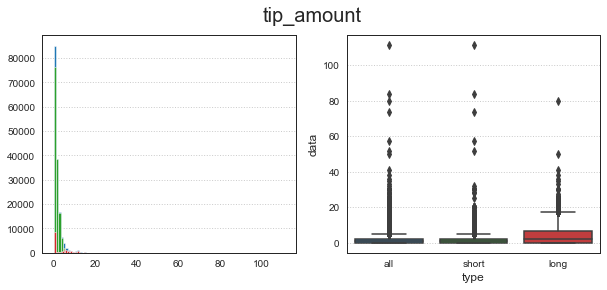

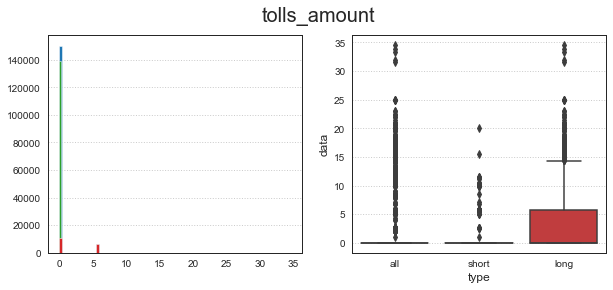

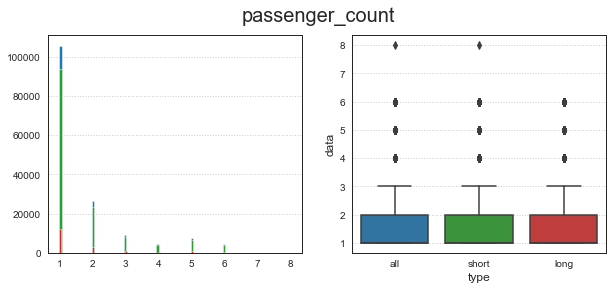

In [23]:
plot_vars_num(data_filtered, 'trip_distance')
plot_vars_num(data_filtered, 'fare_amount')
plot_vars_num(data_filtered, 'total_amount')
plot_vars_num(data_filtered, 'velocity')
plot_vars_num(data_filtered, 'diff_datetime')
plot_vars_num(data_filtered, 'tip_amount', do_log=False)
plot_vars_num(data_filtered, 'tolls_amount', do_log=False)
plot_vars_num(data_filtered, 'passenger_count', do_log=False)

Let us now consider the **categorical variables**:

In [24]:
def plot_vars_cat(data,cols):
    
    short_trips = data[data.trip_distance <= 10/1.6]  # 15km
    long_trips = data[data.trip_distance > 10/1.6]  
        
    for i in cols:
        fig = plt.figure(figsize=(17, 4))
        fig.suptitle(i, fontsize=20, y=1.05)

        sub1 = fig.add_subplot(1,3,1) 
        sns.countplot(x = data[i], data = data, ax=sub1)
        plt.grid(axis = 'y', linestyle='dotted', linewidth=1)
        plt.title('all trips')

        sub2 = fig.add_subplot(1,3,2) 
        sns.countplot(x = short_trips[i], data = short_trips, ax=sub2)
        plt.grid(axis = 'y', linestyle='dotted', linewidth=1)
        plt.title('short trips')

        sub3 = fig.add_subplot(1,3,3) 
        sns.countplot(x = long_trips[i], data = long_trips, ax=sub3)
        plt.grid(axis = 'y', linestyle='dotted', linewidth=1)
        plt.title('long trips')

Main insights can be summarised as follows:
- There are no remarkable differences between long and short distances in terms of these features. Notice that, since there occurred more short than long trips, counts are larger for the proper, but in proportion we can see almost no differences.
- The most common TPEP provider that provided the record was VeriFone (label 2). 
- Standard rates were the most applied (label 1), though some long trips payed the JFK airport rate.
- Credit card was the most used payment method.
- In general, the number of trips for which extras were charged due to rush and overnight hours was lower than were no extras were applied, mainly because the amount of people that travelled at night or at peak hours was lower than the overall amount of trips during the day (and off-peak hours).
- MTA taxes and improvement surchages were charged most of the times.
- Pick-up and drop-off locations quite vary depending on the distance, since long trips may start/end in decentralized areas such as airports (spoiler! we will see more about this later). 

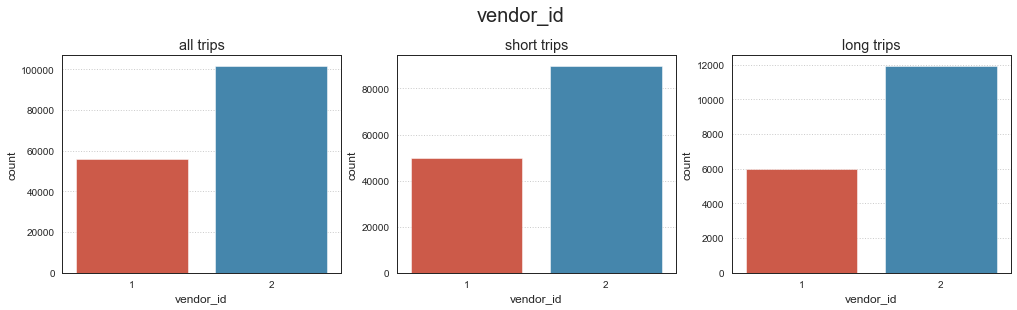

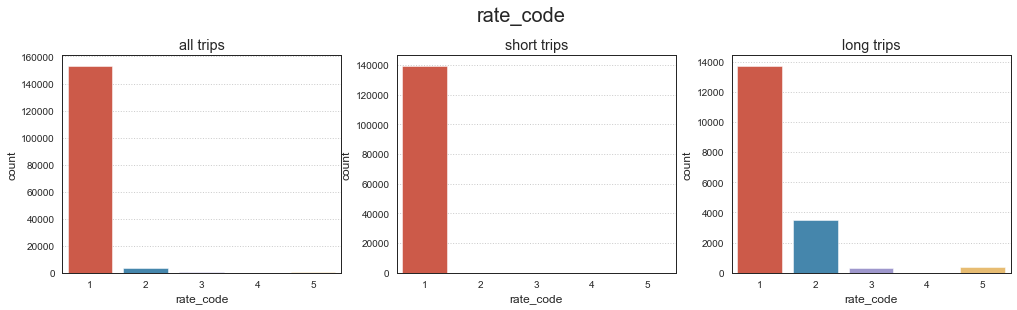

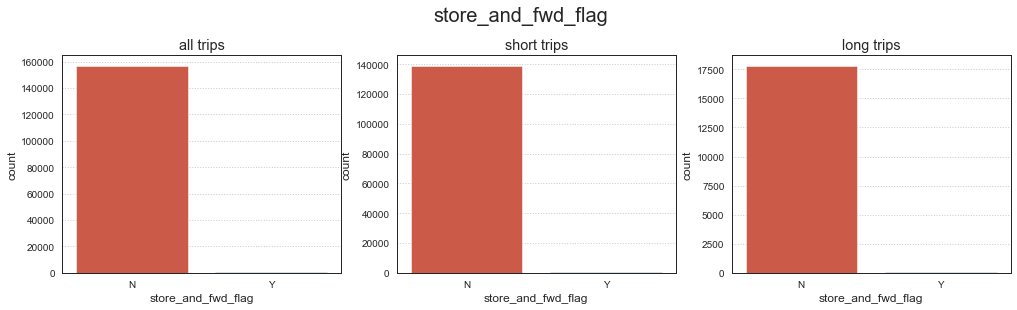

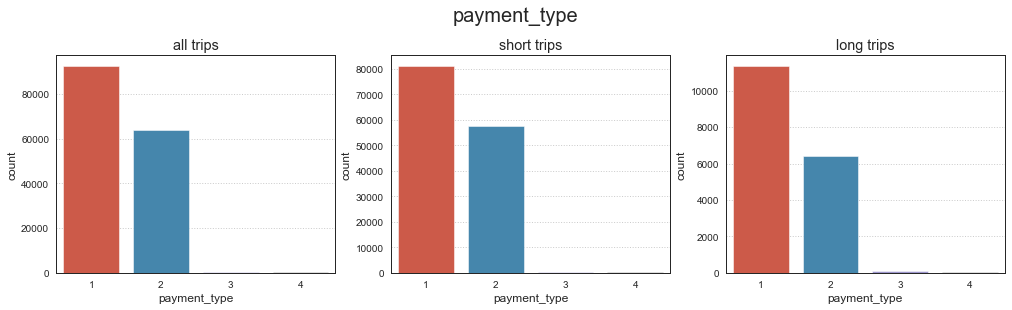

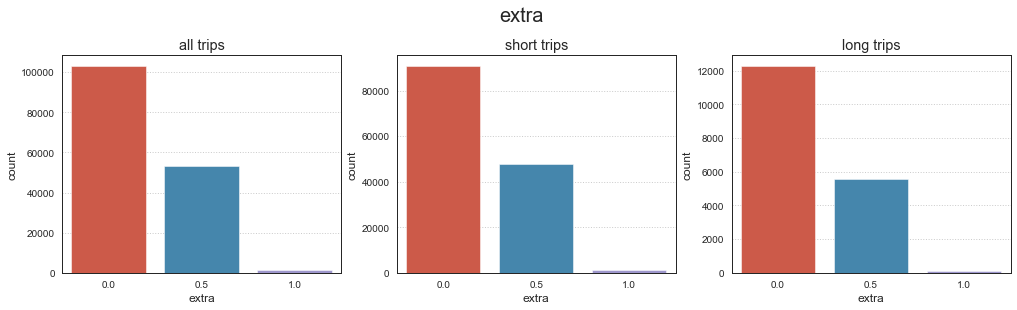

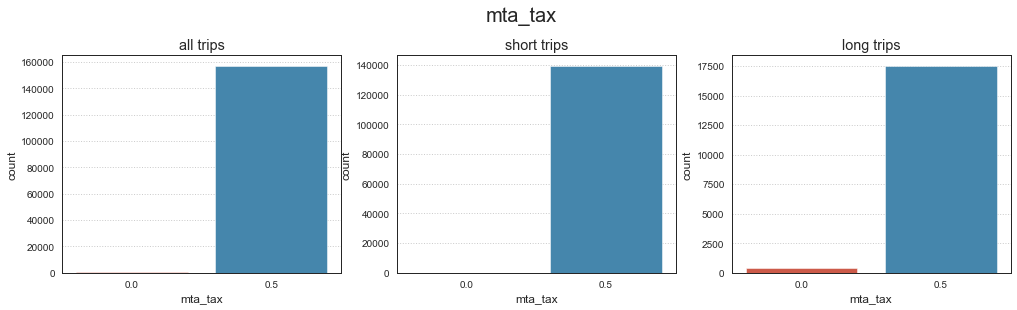

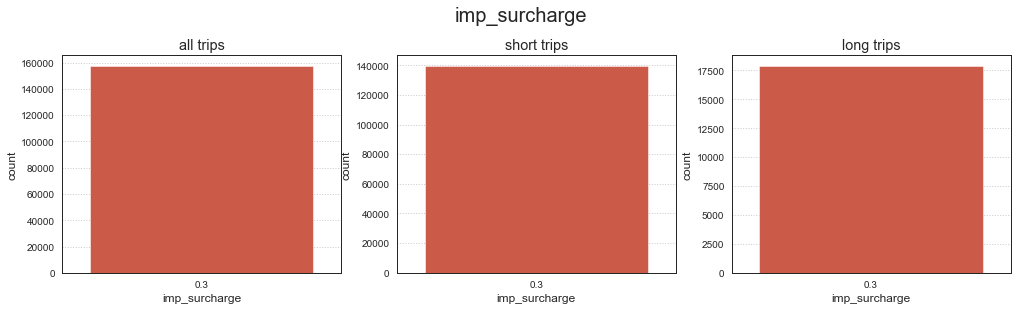

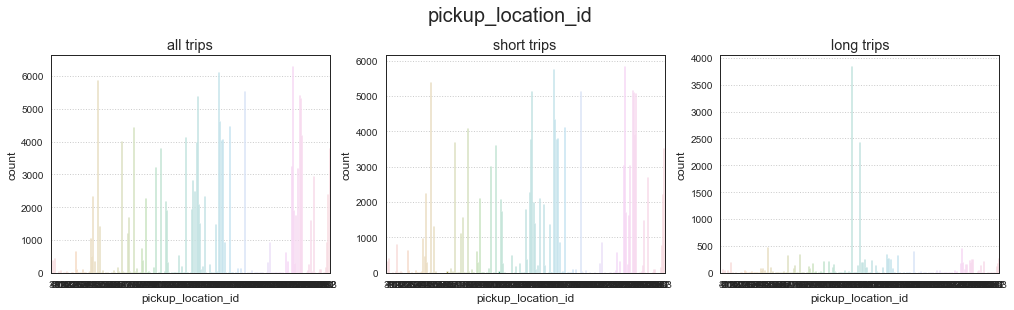

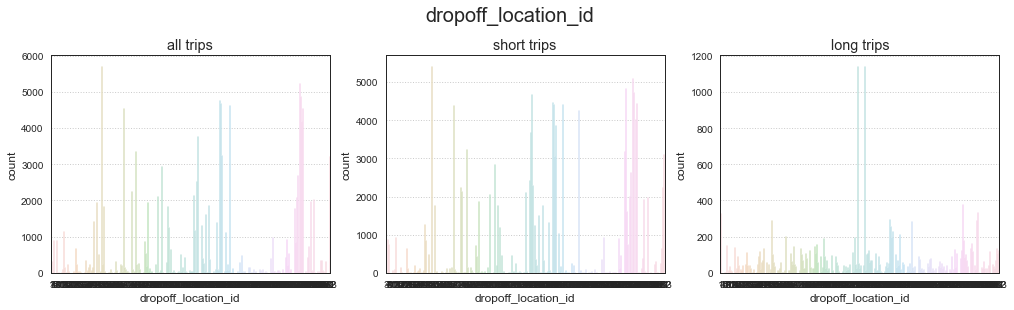

In [25]:
cols = ["vendor_id", "rate_code","store_and_fwd_flag","payment_type","extra","mta_tax","imp_surcharge","pickup_location_id","dropoff_location_id"]
plot_vars_cat(data_filtered,cols)

### Trends and further insights

Now that we have found out several information related to taxi trips during Thanksgiving, we must dig a little bit more. Let us discover which are the peak hours where most people took the taxi.

In [26]:
#Pick ups and drop offs - peak hours
data_filtered['pickup_hour']=data_filtered['pickup_datetime'].dt.hour
data_filtered['dropoff_hour']=data_filtered['dropoff_datetime'].dt.hour

peak_pu = data_filtered.groupby(['pickup_hour'])['trips'].count().reset_index()
peak_do = data_filtered.groupby(['dropoff_hour'])['trips'].count().reset_index()
peak_pu.columns = ['hour', 'trips_pu']
peak_do.columns = ['hour', 'trips_do']
peak_hours = peak_pu.merge(peak_do, on=['hour'], how='left')

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=peak_hours.hour, y=peak_hours.trips_pu, name="Pick-ups", line_color='cadetblue',mode='lines+markers'))
fig.add_trace(go.Scatter(x=peak_hours.hour, y=peak_hours.trips_do, name="Drop-offs", line_color='olive',mode='lines+markers'))

fig.update_layout(
    title="Peak hours",
    xaxis_title="Hour of the day",
    yaxis_title="Count",
    legend_title="Type",
    template="simple_white",
   width=800, height=400)

fig.show();

We can see how the number of trips is greatly reduced at night, as more people is sleeping and some party and stay-late lovers are probably going back home. We can also see two highest peaks during lunch and dinner time, as people is reuniting to spend Thanksgiving together. Additionally, in the plot below we can see how the number of passengers is proportional thoughout the day, being 1 the leading tendency:

In [27]:
data_passenger_count = data_filtered[['pickup_location_id','pickup_hour','passenger_count','trips']]
data_passenger_count = data_passenger_count.groupby(['pickup_hour','passenger_count'])['trips'].count().reset_index()

data_passenger_count['passenger_count'] = data_passenger_count['passenger_count'].astype(str) + ' '

import plotly.express as px
fig = px.bar(data_passenger_count, x="pickup_hour", y="trips", color="passenger_count")
fig.update_layout(
    title="Trips by hour and number of passengers",
    xaxis_title="Hour of the day",
    yaxis_title="Count",
    legend_title="# Passengers",
    template="simple_white",
   width=800, height=400)

fig.show();

On the contrary, we can also visualize how the average speed of the taxis increases at night and decreases during the day, probably because there is more traffic and the streets are busier. At night, people is more prone to speed up their wheels. 

In [28]:
vel_pu = data_filtered.groupby(['pickup_hour'])['velocity'].mean().reset_index()
vel_do = data_filtered.groupby(['dropoff_hour'])['velocity'].mean().reset_index()
vel_pu.columns = ['hour', 'velocity_pu']
vel_do.columns = ['hour', 'velocity_do']
velocity_hours = vel_pu.merge(vel_do, on=['hour'], how='left')

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=velocity_hours.hour, y=velocity_hours.velocity_pu, name="Pick-ups", line_color='cadetblue',mode='lines+markers'))
fig.add_trace(go.Scatter(x=velocity_hours.hour, y=velocity_hours.velocity_do, name="Drop-offs", line_color='olive',mode='lines+markers'))

fig.update_layout(
    title="Velocity per hour",
    xaxis_title="Hour of the day",
    yaxis_title="Average speed [km/h]",
    legend_title="Type",
    template="simple_white",
   width=800, height=400)

fig.show();

Interestingly, the following plot shows that at night, trips were much longer! And trips were also more expensive (which explains the extra overnight charge that is applied), due also to the fact that travelled distances were longer. Probably you have already noticed this drastic peak at 5am. Let's focus on that to try to understand what happend at that specific time.

In [29]:
len_pu = data_filtered.groupby(['pickup_hour'])['trip_distance'].mean().reset_index()
len_do = data_filtered.groupby(['dropoff_hour'])['trip_distance'].mean().reset_index()
len_pu.columns = ['hour', 'length_pu']
len_do.columns = ['hour', 'length_do']
length_hours = len_pu.merge(len_do, on=['hour'], how='left')

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=length_hours.hour, y=length_hours.length_pu*1.6, name="Pick-ups", line_color='cadetblue',mode='lines+markers'))
fig.add_trace(go.Scatter(x=length_hours.hour, y=length_hours.length_do*1.6, name="Drop-offs", line_color='olive',mode='lines+markers'))

fig.update_layout(
    title="Trip distance per hour",
    xaxis_title="Hour of the day",
    yaxis_title=" Distance [km]",
    legend_title="Type",
    template="simple_white",
   width=800, height=400)

fig.show();

tot_pu = data_filtered.groupby(['pickup_hour'])['total_amount'].mean().reset_index()
tot_do = data_filtered.groupby(['dropoff_hour'])['total_amount'].mean().reset_index()
tot_pu.columns = ['hour', 'total_pu']
tot_do.columns = ['hour', 'total_do']
total_hours = tot_pu.merge(tot_do, on=['hour'], how='left')

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=total_hours.hour, y=total_hours.total_pu, name="Pick-ups", line_color='cadetblue',mode='lines+markers'))
fig.add_trace(go.Scatter(x=total_hours.hour, y=total_hours.total_do, name="Drop-offs", line_color='olive',mode='lines+markers'))

fig.update_layout(
    title="Average amount charged per hour",
    xaxis_title="Hour of the day",
    yaxis_title="Total amount [$]",
    legend_title="Type",
    template="simple_white",
   width=800, height=400)

fig.show();

If we extract the top-5 pick-up and drop-off locations at 5am, we can come to a conclusion. The location with most drop-offs was an airport at Queens (LaGuardia)! This airport primarily accommodates airline service to domestic (and limited international) destinations, which explains many people travelling very early in the morning to spend the Thanksgiving day with their loved ones living in a different state. Also, it explains the increase in price, as airport taxi trips are usually expensive. Additionally, the top-3 location is also an airport, while the 5th location is Penn Station, a ferrovial station which serves travelers from not only New York City but also Long Island and New Jersey, explaining people traveling to these two destinations form NYC. Lastly, the most demanded pick-up location was JFK Airport, from people coming back home to visit friends and family for the holiday.

In [30]:
data5=data_filtered[data_filtered.dropoff_hour==5]
data5=data5.groupby(['dropoff_location_id'])['trips'].count().reset_index()
data5 = data5.sort_values(by = 'trips').reset_index()

taxi_zones = pd.read_csv('data/taxi+zonelookup.csv')
print('Top-5 drop-off locations at 5am:')
for i in range(5):
    indx = np.where(taxi_zones.LocationID == data5['dropoff_location_id'].values[-i-1])
    val = taxi_zones.iloc[[indx[0][0]]].Zone.iat[0]
    
    print(1+i,'->',val, '(',data5['dropoff_location_id'].values[-i-1] ,')', '; number of trips:', data5['trips'].values[-i-1])
    
    
data5=data_filtered[data_filtered.pickup_hour==5]
data5=data5.groupby(['pickup_location_id'])['trips'].count().reset_index()
data5 = data5.sort_values(by = 'trips').reset_index()
print('\nTop-5 pick-up locations at 5am:')
for i in range(5):
    indx = np.where(taxi_zones.LocationID == data5['pickup_location_id'].values[-i-1])
    val = taxi_zones.iloc[[indx[0][0]]].Zone.iat[0]
    
    print(1+i,'->',val, '(',data5['pickup_location_id'].values[-i-1] ,')', '; number of trips:', data5['trips'].values[-i-1])



Top-5 drop-off locations at 5am:
1 -> LaGuardia Airport ( 138 ) ; number of trips: 133
2 -> East Chelsea ( 68 ) ; number of trips: 113
3 -> JFK Airport ( 132 ) ; number of trips: 71
4 -> Lincoln Square East ( 142 ) ; number of trips: 63
5 -> Penn Station/Madison Sq West ( 186 ) ; number of trips: 61

Top-5 pick-up locations at 5am:
1 -> JFK Airport ( 132 ) ; number of trips: 111
2 -> Clinton East ( 48 ) ; number of trips: 99
3 -> Times Sq/Theatre District ( 230 ) ; number of trips: 68
4 -> East Chelsea ( 68 ) ; number of trips: 60
5 -> Yorkville West ( 263 ) ; number of trips: 58


### Spatial analysis

We have seen how the hour of the day affected the costs, duration and speed of the trips. Now lets take a look at the spatial features to understand and visualize most common trips and keep on gaining knowledge about how busy streets are and where people travel inside the city during this important holiday.

First, we are going to visualize the network of NYC taxi trips, defined as follows:
- *Node*: represents each location.
- *Link*: defines a trip from one location (source) to another (target).
- *Weight*: corresponds to the number of trips associated to a specific link.

To be able to extract the links and weights, an `R` code was developed (*see notebook Annex I, section Chunk 1*). The extracted files containing node and link information were imported to Gephi software to visualize the network using the 'Geo Layout' distribution, which considers coordinates to locate each node. The number of trips from one node to another is represented in a scale from dark (greater) to light (lower) green. A different representation was made, showing in black those links with weights larger than 100, meaning that more than 100 trips where done between connected stations (considering directions).

![map](images/mapa_gephi.png)

From the two plots it can be seen that most trips occurred within the borough of Manhattan. The fact that it is considered to be the downtown of NYC explains the huge number of trips during the day. Additionally, lots of trips from many different regions start or end at JFK Airport and LaGuardia Airport, which is related to the previous findings regarding airports and mobility to travel in and out the city.

![map](images/mapa_gephi_mayor100_full.png)

Let us now load the data to continue with the exploration:

In [31]:
nodes = pd.read_csv('data/nodes.csv')
links = pd.read_csv('data/links.csv')

First, let us find the most common trips:

In [32]:
links = links.sort_values(by = 'weight').reset_index()

print('Top 5 most common trips:\n')
for i in range(5):
    indx_s = np.where(nodes.Id == links['source'].values[-i-1])
    val_s = nodes.iloc[[indx_s[0][0]]].Name.iat[0]
    
    indx_t = np.where(nodes.Id == links['target'].values[-i-1])
    val_t = nodes.iloc[[indx_t[0][0]]].Name.iat[0]
    
    print(1+i,'-> from',val_s, '(',links['source'].values[-i-1] ,')', 'to', val_t, '(', links['target'].values[-i-1],')', '; number of trips:', links['weight'].values[-i-1])


Top 5 most common trips:

1 -> from Upper East Side South ( 237 ) to Upper East Side North ( 236 ) ; number of trips: 744
2 -> from Upper West Side South ( 239 ) to Upper West Side North ( 238 ) ; number of trips: 628
3 -> from Upper East Side North ( 236 ) to Upper East Side South ( 237 ) ; number of trips: 620
4 -> from Upper West Side South ( 239 ) to Lincoln Square East ( 142 ) ; number of trips: 613
5 -> from Upper East Side North ( 236 ) to Upper East Side North ( 236 ) ; number of trips: 524


Related with the previous findings, all the locations in this top-5 belong to the borough of Manhattan. And what if we take a look at the most common short and long trips?

In [33]:
data_filtered['trip_id'] = data_filtered.pickup_location_id.astype(str) + '.' + data_filtered.dropoff_location_id.astype(str)
short_trips = data_filtered[data_filtered.trip_distance <= 10/1.6]  # 15km
long_trips = data_filtered[data_filtered.trip_distance > 10/1.6] 
    
agg_short_trips = short_trips.groupby(['trip_id'])['trips'].count().reset_index()
agg_short_trips = agg_short_trips.sort_values(by = 'trips') # --> last position contains the result
print(agg_short_trips.values[-1])

agg_long_trips = long_trips.groupby(['trip_id'])['trips'].count().reset_index()
agg_long_trips = agg_long_trips.sort_values(by = 'trips') # --> last position contains the result
print(agg_long_trips.values[-1], '\n')

# print results in a fancy way
agg_short_trips['source'], agg_short_trips['target'] = agg_short_trips['trip_id'].str.split('.', 1).str
agg_short_trips = agg_short_trips.drop("trip_id", axis=1)
agg_short_trips.columns = ['weight', 'source', 'target']

indx_s = np.where(nodes.Id == int(agg_short_trips['source'].values[-1]))
val_s = nodes.iloc[[indx_s[0][0]]].Name.iat[0]
indx_t = np.where(nodes.Id == int(agg_short_trips['target'].values[-1]))
val_t = nodes.iloc[[indx_t[0][0]]].Name.iat[0]
print('Most common short trip: from',val_s, '(',agg_short_trips['source'].values[-1] ,')', 'to', val_t, '(', agg_short_trips['target'].values[-1],')', '; number of trips: ', agg_short_trips['weight'].values[-1])

agg_long_trips['source'], agg_long_trips['target'] = agg_long_trips['trip_id'].str.split('.', 1).str
agg_long_trips = agg_long_trips.drop("trip_id", axis=1)
agg_long_trips.columns = ['weight', 'source', 'target']

indx_s = np.where(nodes.Id == int(agg_long_trips['source'].values[-1]))
val_s = nodes.iloc[[indx_s[0][0]]].Name.iat[0]
indx_t = np.where(nodes.Id == int(agg_long_trips['target'].values[-1]))
val_t = nodes.iloc[[indx_t[0][0]]].Name.iat[0]
print('Most common long trip: from',val_s, '(',agg_long_trips['source'].values[-1] ,')', 'to', val_t, '(', agg_long_trips['target'].values[-1],')', '; number of trips: ', agg_long_trips['weight'].values[-1])


['237.236' 744]
['132.230' 222] 

Most common short trip: from Upper East Side South ( 237 ) to Upper East Side North ( 236 ) ; number of trips:  744
Most common long trip: from JFK Airport ( 132 ) to Times Sq/Theatre District ( 230 ) ; number of trips:  222


Again, the most common short trip occurred between two locations located in Manhattan, very close to each other. And the most common long trip ocurred between Times Squares, also in Manhattan, and the JFK Airport. All of this is aligned to what we saw earlier.

Additionally, different dynamic plots where built in `R` for deeper insights. Here are added screenshots, but you can refer to *notebook Annex I, section Chunk 2* to play with the maps. First, a map of NYC was shown indicating both the total amount of pick-ups and drop-offs in each zone. These plot resembles a heatmap representing the most transited zones. In line with previous statements, the mayority of pick ups and drop offs occured in popular areas such as Manhattan or airports, and the further away we move from the city center, less trips occur. 

![map1](images/pick_count.png)

![map2](images/drop_count.png)

Aditionally, as stated, most passengers travel alone. But still there are some areas where people go in groups:

![map3](images/pick_pass.png)

![map4](images/drop_pass.png)

## Model building

In this last section we will try to infer tips based on the available data and we will discuss the results. We will first train different models and select the one yielding the most accurate results, to later analyze which features were more important for predicting the tips. 

The pipeline for model building is the following:
1. ***Feature engineering***
2. ***Preprocessing***: encording and standarization
3. ***Feature selection***
4. ***Model training***

Recall that at the very begining, we saw that there were no missing values, so imputation won't be included in this pipeline 

### *Feature engineering*

In previous steps, we created new variables for the analysis, `velocity` and `diff_datetime`, and we will use them as well for predictions. In addition to that, we will convert pick-up and drop-off datetimes into new separate variables: `hour` (already constructed before), `min` and `sec`. 

In [34]:
# Some more feature engineering
data_to_model=data_filtered.drop(['trips','trip_id'],axis=1) # trips does not describe the data (index) and encoding the categorical 
data_to_model['pickup_min']=data_to_model['pickup_datetime'].dt.minute     #variable will make the dataset too large, so for simplicity it wont be considered
data_to_model['dropoff_min']=data_to_model['dropoff_datetime'].dt.minute

data_to_model['pickup_sec']=data_to_model['pickup_datetime'].dt.second
data_to_model['dropoff_sec']=data_to_model['dropoff_datetime'].dt.second
data_to_model=data_to_model.drop(['pickup_datetime','dropoff_datetime'],axis=1)

#data_to_model['pickup_week']=data_to_model['pickup_datetime'].dt.day_name() #not useful since all data belongs to the same day
#data_to_model['dropoff_week']=data_to_model['dropoff_datetime'].dt.day_name() #but interesting when not

Let's check the column names:

In [35]:
data_to_model.columns 

Index(['vendor_id', 'passenger_count', 'trip_distance', 'rate_code',
       'store_and_fwd_flag', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'imp_surcharge', 'total_amount',
       'pickup_location_id', 'dropoff_location_id', 'diff_datetime',
       'velocity', 'pickup_hour', 'dropoff_hour', 'pickup_min', 'dropoff_min',
       'pickup_sec', 'dropoff_sec'],
      dtype='object')

Before continuing, we are going to split the data into training, validation and test. We will keep the validation data to perform hyperparameter tunning (*inner evaluation*) and the test data to evaluate the performance of the model (*outter evaluation*).

In [36]:
# Train/test split

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# Divide X and y
y = data_to_model.tip_amount
X = data_to_model.drop('tip_amount', axis=1)

# Holdout for outter evaluation (model selection)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0) # random_state = 0 for reproducibility

# Crossvalidation for inner evaluation (hyperparameter tuning)
cv_grid = KFold(n_splits=3, shuffle=True, random_state=0) 

print('X_train:',X_train.shape, 'y_train:', y_train.shape)
print('X_test:',X_test.shape, 'y_test:', y_test.shape)

X_train: (118176, 22) y_train: (118176,)
X_test: (39392, 22) y_test: (39392,)


### *Preprocessing*

Now, we will standardize the numerical variables so that all variables give equal contribution to the model. Also, to avoid creating numerical dependencies among categorical variables, we will one-hot-encode them. The following chunk of code will be included in each model pipeline as the preprocessing step.

In [37]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_features = ["passenger_count", "trip_distance", "fare_amount", "tolls_amount","total_amount","diff_datetime","velocity","pickup_hour","dropoff_hour","pickup_min","dropoff_min","pickup_sec","dropoff_sec"]
numerical_transformer = StandardScaler()

categorical_features = ["vendor_id", "rate_code", "store_and_fwd_flag","payment_type","extra","mta_tax","imp_surcharge","pickup_location_id","dropoff_location_id"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ])

### *Feature selection and model training*

Now, we will select features according to the k highest scores using the *Select K Best method*, being k a hyperparameter, and we will train different regression models: a **Dummy** model, and two simple models, namely (1) a **K-Nearest Neighbour** (KNN) model and (2) a **Decision Tree** (DT) model. The trivial/dummy model will be used as a reference, and the other models will be trained with and without hyperparameter tuning.

In [38]:
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from time import time
from sklearn import metrics
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform, expon
from sklearn import neighbors
from tempfile import mkdtemp
from joblib import Memory
from sklearn import tree
from scipy.stats import sem # standard deviation

#### Trivial model

In [39]:
np.random.seed(0)

pipe_dummy = Pipeline([("preprocessor", preprocessor),
                       ('feature_selection', SelectKBest(score_func = f_regression)),
                       ('model',DummyRegressor(strategy='mean'))])
t1 = time()
scores_dummy = -cross_val_score(pipe_dummy,
                                  X_train, y_train, 
                                  scoring='neg_root_mean_squared_error', 
                                  cv = cv_grid)

t_dummy = time() - t1
print("Mean score: {0:.3f} (+/-{1:.3f})".format(scores_dummy.mean(), sem(scores_dummy)))
print(f'Elapsed time: {t_dummy}')

# Outer evaluation
pipe_dummy.fit(X_train, y_train)
y_test_pred=pipe_dummy.predict(X_test)

RMSE_outer_dummy=metrics.mean_squared_error(y_test, y_test_pred,squared=False)
print('Outer RMSE:', RMSE_outer_dummy)

Mean score: 2.246 (+/-0.053)
Elapsed time: 1.2710702419281006
Outer RMSE: 2.200414652645138


#### KNN - default hyperparameters

In [40]:
t1 = time()

pipe_knn = Pipeline([("preprocessor", preprocessor),
                     ('feature_selection', SelectKBest(score_func = f_regression)),
                     ('model',neighbors.KNeighborsRegressor())])

scores_knn_def = -cross_val_score(pipe_knn,
                         X_train, y_train, 
                         scoring='neg_root_mean_squared_error', 
                         cv = cv_grid)     
t_knn_def = time() - t1

print("Mean score: {0:.3f} (+/-{1:.3f})".format(scores_knn_def.mean(), sem(scores_knn_def)))
print(f'Elapsed time: {t_knn_def}')

# Outer evaluation
pipe_knn.fit(X_train, y_train)
y_test_pred=pipe_knn.predict(X_test)
RMSE_outer_knn=metrics.mean_squared_error(y_test, y_test_pred,squared=False)
print('Outer RMSE:',RMSE_outer_knn)

Mean score: 0.683 (+/-0.069)
Elapsed time: 360.681245803833
Outer RMSE: 0.5642996558965848


#### KNN - hyperparameter tunning using random search

In [41]:
# Search space
param_grid = {'model__n_neighbors': sp_randint(1,16),
              'model__weights': ['uniform', 'distance'],
              'model__p': sp_randint(1,2)}

budget = 10
np.random.seed(0)

clf_knn_rand = RandomizedSearchCV(pipe_knn, 
                         param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=cv_grid, 
                         n_jobs=1, verbose=0,
                         n_iter=budget
                        )

t1 = time()
clf_knn_rand.fit(X=X_train, y=y_train)
t_knn_rand = time() - t1

print(f'Elapsed time: {t_knn_rand}')
print(f"Mean score: {-clf_knn_rand.best_score_}")

# Outer evaluation
clf_knn_rand.fit(X_train, y_train)
y_test_pred=clf_knn_rand.predict(X_test)
print('Outer RMSE:')
RMSE_outer_knn_rand=metrics.mean_squared_error(y_test, y_test_pred,squared=False)
print(RMSE_outer_knn_rand)

Elapsed time: 2017.3103144168854
Mean score: 0.6777786498071657
Outer RMSE:
0.5589830512737025


#### Decision tree - default hyperparameters

In [42]:
np.random.seed(0)
t1 = time()

pipe_dt = Pipeline([("preprocessor", preprocessor),
                     ('feature_selection', SelectKBest(score_func = f_regression)),
                     ('model',tree.DecisionTreeRegressor())])

scores_dt_def = -cross_val_score(pipe_dt,
                         X_train, y_train, 
                         scoring='neg_root_mean_squared_error', 
                         cv = cv_grid)   
t_dt_def = time() - t1

print("Mean score: {0:.3f} (+/-{1:.3f})".format(scores_dt_def.mean(), sem(scores_dt_def)))
print(f'Elapsed time: {t_dt_def}')

# Outer evaluation
pipe_dt.fit(X_train, y_train)
y_test_pred_dt=pipe_dt.predict(X_test)
RMSE_outer_dt=metrics.mean_squared_error(y_test, y_test_pred_dt,squared=False)
print('Outer RMSE:',RMSE_outer_dt)

Mean score: 0.539 (+/-0.080)
Elapsed time: 7.382272958755493
Outer RMSE: 0.34556241896734574


#### Decision tree - hyperparameter tunning using bayesian search

In [43]:
from skopt import BayesSearchCV
from skopt.space import Integer, Real, Categorical

param_grid_DT = {'model__max_depth': Integer(2,100),
                 'model__min_samples_split': Real(0.00000000001, 1), #the range starts at a very small number close to zero: (0,1]
                 'model__criterion': Categorical(['mse', 'friedman_mse'])}
budget = 20
np.random.seed(0)

clf_dt_skopt = BayesSearchCV(pipe_dt, 
                    param_grid_DT,
                    scoring='neg_root_mean_squared_error',
                    cv=cv_grid,    
                    n_jobs=1, verbose=0,
                    n_iter=budget
                    )
t1 = time()
clf_dt_skopt.fit(X=X_train, y=y_train)
t_dt_skopt = time() - t1

print(f'Elapsed time: {t_dt_skopt}')
print(f"Mean score: {-clf_dt_skopt.best_score_}")

# Outer evaluation
clf_dt_skopt.fit(X_train, y_train)
y_test_pred=clf_dt_skopt.predict(X_test)
RMSE_outer_dt_skopt=metrics.mean_squared_error(y_test, y_test_pred,squared=False)
print('Outer RMSE:',RMSE_outer_dt_skopt)

Elapsed time: 68.11541032791138
Mean score: 0.480786590973388
Outer RMSE: 0.3473819626688096


### *Model evaluation and selection*

In the following table we can see the results of the trained models. As expected, the dummy model performs way worst than the KNN or the DT, though it is much faster due to its simple computation. Additionally, the KNN not only takes much longer to train but it also gives worst results than the decision tree models. Even though both DT models perform very similar in terms of outer validation, we will select the default model as the optimal one because it is faster. Notice that the fact that the outer RMSE is lower than the inner, indicates that the model is not overfitted. 

In [44]:
# function for highlighting results in df
def highlight_min(s):
    is_min = s == s.min()
    return ['background-color: yellow' if v else '' for v in is_min]

In [45]:
df1=pd.DataFrame({"Inner RMSE":scores_dummy.mean(),"Outer RMSE":RMSE_outer_dummy,"Elapsed time":t_dummy},index=['Trivial'])

df2=pd.DataFrame({"Inner RMSE":scores_knn_def.mean(),"Outer RMSE":RMSE_outer_knn,"Elapsed time":t_knn_def},index=['Default KNN'])
df3=pd.DataFrame({"Inner RMSE":-clf_knn_rand.best_score_,"Outer RMSE":RMSE_outer_knn_rand,"Elapsed time":t_knn_rand},index=['HPT KNN'])

df4=pd.DataFrame({"Inner RMSE":scores_dt_def.mean(),"Outer RMSE":RMSE_outer_dt,"Elapsed time":t_dt_def},index=['Default DT'])
df5=pd.DataFrame({"Inner RMSE":-clf_dt_skopt.best_score_,"Outer RMSE":RMSE_outer_dt_skopt,"Elapsed time":t_dt_skopt},index=['HPT DT'])

result_dt = pd.concat([df1,df2,df3,df4,df5])
print("Summary of the results:")
result_dt.style.apply(highlight_min, subset=['Inner RMSE', 'Outer RMSE','Elapsed time'])

Summary of the results:


### *Discussion*
Now that we have selected the optimum model, let us take a look at the predictions to see how much they resemble the ground truth.  

On the left-hand graph, the 'ideal' model is represented by the black line. The further away we move from this line, the worst are the predictions. Notice that most of the dots lie on/close to the line, and no tips are estimated to be negative. Large tips are harder to predict, as points spread more when they are away from 0. This occurs because we have less data samples with huge tips and many entries with lower amounts, so the model better learns how to predict smaller values from the input data. 

The right-hand side, we can see that the distributions are very similar, though for very small tips, the model tends to output 0, which can be seen by looking at the huge peak at 0 dollar tips followed by a large drop just after that. This can also by seen on the previous graph by looking at its bottom left part.

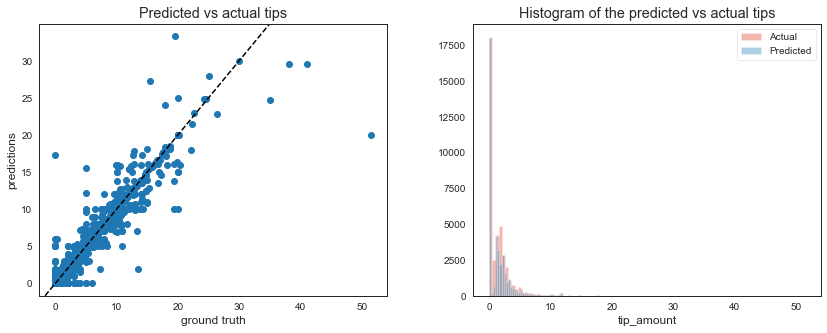

In [46]:
fig = plt.figure(figsize=(14, 5))
plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

sub1 = fig.add_subplot(1,2,1) 
plt.plot(y_test, y_test_pred_dt,'ro', color='tab:blue')
plt.axline((1, 1), slope=1, color='k', linestyle='--')
plt.xlabel('ground truth')
plt.title('Predicted vs actual tips');
plt.ylabel('predictions');

sub2 = fig.add_subplot(1,2,2) 
sns.distplot(y_test, hist=True, kde=False, bins=100)
sns.distplot(y_test_pred, hist=True, kde=False, bins=100)
plt.legend(labels=['Actual', 'Predicted'])
plt.title('Histogram of the predicted vs actual tips');

Another interesting thing is to look for the variables that play an important role in predicting the tips. As observed from the following graph, from more than 500 features, only a few ones are actually providing useful information. Our model has selected 10 features (remember that the selected model was the one with default parameters), which appears to be good enough to obtain appropriate estimations.

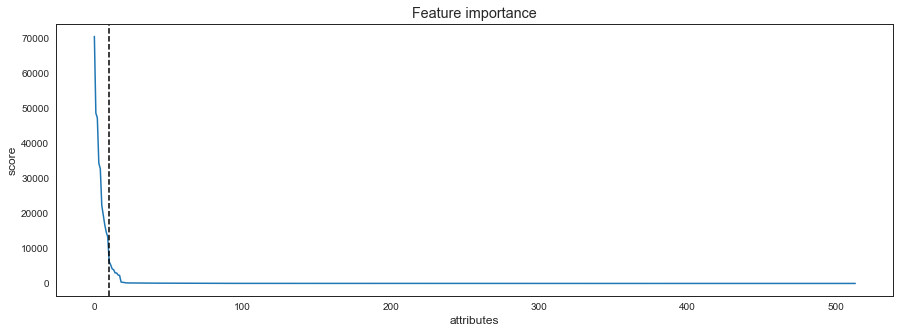

In [47]:
importances = pipe_dt.named_steps["feature_selection"].scores_

fig = plt.figure(figsize=(15, 5))
plt.plot(-np.sort(-importances), color='tab:blue')
plt.axvline(x=10,color='k',linestyle='--')
plt.xlabel('attributes')
plt.title('Feature importance')
plt.ylabel('score');

Lets see which are these 10 features:

In [48]:
num_feats = numerical_features
cat_feats = pipe_dt.named_steps["preprocessor"].transformers_[1][1].get_feature_names(categorical_features)
feats = np.hstack([np.array(num_feats),cat_feats])

importances = pipe_dt.named_steps["feature_selection"].scores_
sorted_attributes = np.argsort(-importances)
sorted_scores = np.sort(-importances)
sorted_names = feats[sorted_attributes]

for index,element in enumerate(zip(sorted_attributes,sorted_names, -sorted_scores)):
    print (element)
    if index>8: break

(4, 'total_amount', 70530.75778953772)
(22, 'payment_type_1', 48631.66069101803)
(23, 'payment_type_2', 47247.6077656221)
(2, 'fare_amount', 34335.654537909606)
(1, 'trip_distance', 32742.344169633674)
(5, 'diff_datetime', 22271.554657185032)
(3, 'tolls_amount', 19510.48966601213)
(6, 'velocity', 16763.71743230238)
(15, 'rate_code_1', 14636.537388489032)
(16, 'rate_code_2', 13331.825559952125)


It can be seen that most of these variables are numerical variables related with money: the total cost of the trip is directly related with the costs that add up, including tips. Also, tips are influenced by the distance, speed, and duration of the trips, which are also directly related among each other. Whether the applied rate is standard or not and whether it is a JFK rate or not is of great importance as well. In addition, the fact that payments were done with cash or credit card is important to estimate tips, while being charged or not is not meaninful for this purpose. On the contrary location variables such as pick-up and drop-off zones do not seem to aid in predicting tips.

## To sum up

We have extracted some useful knowledge about NYC taxi mobility during Thanksgiving. The main aspects can be summarized as follows:
- A higher amount of **single-passenger short trips** ocurred, indicating that most people went to spend the day with others living close. In fact, the borough of **Manhattan** was the most traveled.
- **Longer distance** trips took in general **less time** to complete, though **traffic** due to the holiday could affect both duration and price. The mayority of the drivers whose price included **toll charges** were long, as they would probably took the **highway**. 
- Most people payed with **credit card**, and the **standard rate** was applied. Though, some long trips were charged the JFK rate as they were headed to the airport or had just landed and wanted to go to the city. 
- There was a great demanding of trips from and to different **airports and train stations at 5 am**. For instance, **LaGuardia Airport**, a domestic flights airport, was the location demanding more drop-offs for people to travel to other states early in the morning. Also, many taxis picked-up people at **JFK Airport**, probably after a long night flight from other countries all around the world.
- Given **tips** to taxi drivers was mainly **influenced by** the price of the trip, which is related to the speed, duration and distance traveled. Also, applying standard rates or JFK rates, and credit card payments or cash payments had also something to do with the tips amount. Nevertheless, estimating tips is a complicated task, and further study is needed to obtain a more reliable model for predictions.